In [64]:
import pandas as pd

# 데이터 준비
education = pd.read_csv('data/사교육비.csv')
sum = pd.read_csv('data/합계출산율.csv')

In [65]:
merged_df = pd.merge(education, sum, on=['시점', '지역별'], how='outer')
# merged_df.head(), merged_df.tail(), merged_df.shape

In [66]:
# 결측치가 있는 행을 제거하고 복사본 생성
df_cleaned = merged_df.dropna(subset=['총소득', '사교육비'], how='any').copy()

# 총소득을 만원 단위로 변환
df_cleaned['총소득'] = df_cleaned['총소득'] * 0.01

# 비율 계산
df_cleaned['비율'] = df_cleaned['사교육비'] / df_cleaned['총소득']
# df_cleaned.head(),df_cleaned.tail()

In [67]:
# df_cleaned[['총소득', '사교육비']].describe()

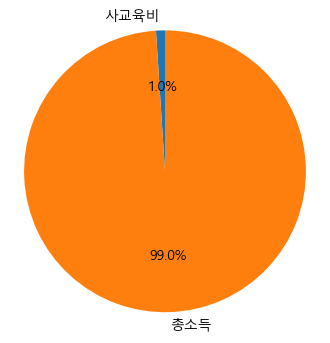

In [68]:
import matplotlib.pyplot as plt

# 폰트 깨짐 해결
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 총소득과 사교육비의 총합 계산
total_income = df_cleaned['총소득'].sum()
total_education_expense = df_cleaned['사교육비'].sum()

# 파이 차트 데이터
sizes = [total_education_expense, total_income - total_education_expense]
labels = ['사교육비', '총소득']

# 파이 차트 생성
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원형 차트로 보이게 설정
plt.show()